In [2]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits #lib with submodule io is submodule uses FITS for images 

In [3]:
fname = "HorseHead.fits" #assing the name to a variable 
hdu_list = fits.open(fname) #only needs file name since in the same directory 

#certain formats for FITS images 
#reading in data units 
#hdu_list is a varaible? open is a function 

hdu_list.info()

#info gives file name and primary hdu and (int16 is 16 bit integers)
#list (table) er.mask.. (the table data is not needed)
#digiized it from a photograph 
#digital cameras are new 
#charged couple devices 
#phone CMOST detectors 
#b4 silicon wafers and the photons liberates an electorn from the silicon and the charge sits in the detector 
#read out from every pixel the amount of electrons in each pixel that were liberated you obtain an image 


Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [4]:
image_data = hdu_list[0].data 
#primary hdu contains the image (above)
#this reads in the image 891x893 into image data 

In [5]:
image_header = hdu_list[0].header #gives you info on how to rotate image with a matrix 
print(image_header)

SIMPLE  =                    T /FITS: Compliance                                BITPIX  =                   16 /FITS: I*2 Data                                  NAXIS   =                    2 /FITS: 2-D Image Data                            NAXIS1  =                  891 /FITS: X Dimension                               NAXIS2  =                  893 /FITS: Y Dimension                               EXTEND  =                    T /FITS: File can contain extensions               DATE    = '2014-01-09        '  /FITS: Creation Date                            ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                REGION  = 'ER768   '           /GSSS: Region Name                               PLATEID = 'A0JP    '           /GSSS: Plate ID                                  SCANNUM = '01      '           /GSSS: Scan Number                               DSCNDNUM= '00      '           /GSSS: De

In [56]:
print(type(image_data)) #print the infomation of the above this is an array 
print(image_data.shape) #this is the transpose of the dimensions *issue with the system 

<class 'numpy.ndarray'>
(893, 891)


In [57]:
hdu_list.close() #close the fits file 
#why.. 


In [58]:
image_data = fits.getdata(fname) #only want the data of the file 
print(type(image_data)) #read in 1st data of the primary hdu
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


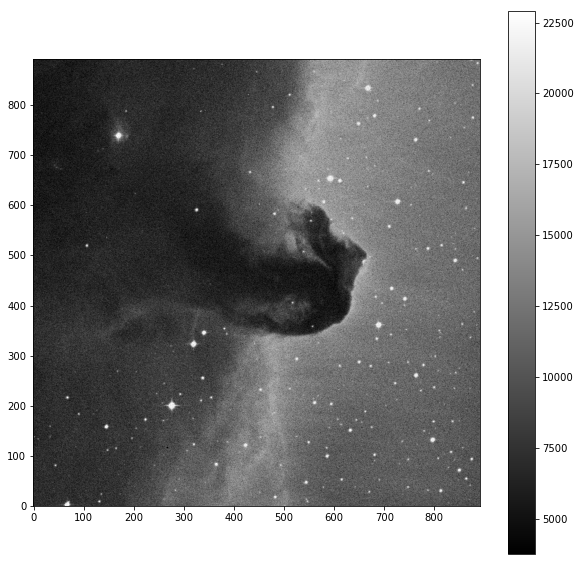

In [59]:
fig = plt.figure(figsize = (10,10))
plt.imshow(image_data,cmap='gray', origin= 'lower')
plt.colorbar()

In [60]:
#stats 

print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))



Min: 3759
Max: 22918
Mean: 9831.48167629
Stdev: 3032.3927542


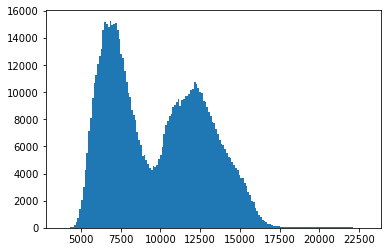

In [61]:
histogram = plt.hist(image_data.flatten(), bins = 'auto')# not normalized
#each bin has exactly the amout of pixiels 


In [62]:
idx = np.where(image_data <10000.)
data_copy = image_data.copy()
data_copy[idx] = 0.0

In [63]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

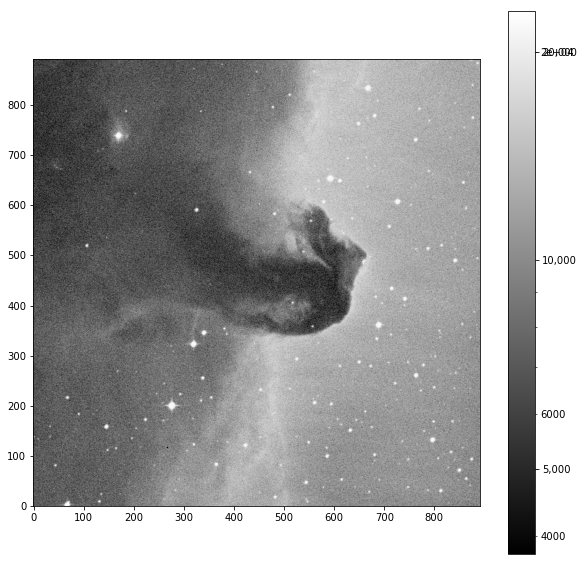

In [64]:
fig = plt.figure(figsize = (10,10))
plt.imshow(image_data, cmap = 'gray', norm = LogNorm(),origin = 'lower' )
#used to see fine features, not great bc is a digitized image 

cbar = plt.colorbar(ticks = [5.e3, 1.e4, 2.e4])
cbar.ax.set_yticklabels(['5,000', '10,000', '20,000'])


In [65]:
#stacking images 

image_list = ['M13_blue_0001.fits', 'M13_blue_0002.fits', 'M13_blue_0003.fits','M13_blue_0004.fits', 'M13_blue_0005.fits']

In [66]:
image_concat = [fits.getdata(image) for image in image_list] 
#make an array of the images 
#of the 3d image we will have a list of 5 images 
#looping through them, read data, then make list of images 

In [67]:
print(type(image_concat[0]))
print(image_concat[0].shape)

<class 'numpy.ndarray'>
(1040, 1392)


In [68]:
final_image = np.sum(image_concat, axis = 0)
#summing them 
#allong the 1st axxis we will summ the pixels and put into a new image 


In [69]:
print(type(final_image))
print(final_image.shape)

<class 'numpy.ndarray'>
(1040, 1392)


(0, 3500)

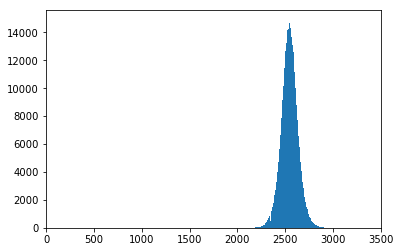

In [70]:
image_hist = plt.hist(final_image.flatten(), bins = 'auto')
plt.xlim([0,3500])

(0, 3500)

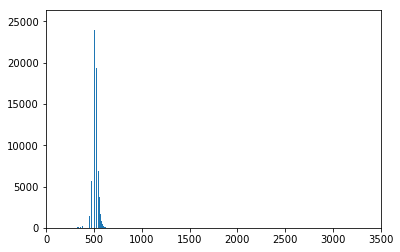

In [71]:
image_hist = plt.hist(image_concat[0].flatten(), bins ='auto') #this is one image 
plt.xlim([0,3500])

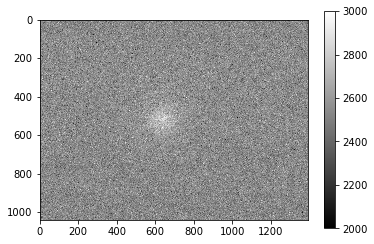

In [72]:
plt.imshow(final_image, cmap = 'gray', vmin =2E3, vmax =3E3)
plt.colorbar()

In [73]:
outfile = 'stacked_M13_blue.fits'
hdu = fits.PrimaryHDU(final_image) #pass the image we want to save 
hdu.writeto(outfile, overwrite=True) #write to a file 